In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_allstates = pd.read_csv('states_all.csv')
df_allstates.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [3]:
df_allstates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [4]:
df_allstates.isnull().sum()*100/df_allstates.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [15]:
df_allstates_2 = df_allstates.copy()

fill_list = ["ENROLL","TOTAL_REVENUE","FEDERAL_REVENUE","STATE_REVENUE","LOCAL_REVENUE","TOTAL_EXPENDITURE","INSTRUCTION_EXPENDITURE",
            "SUPPORT_SERVICES_EXPENDITURE","OTHER_EXPENDITURE","CAPITAL_OUTLAY_EXPENDITURE","GRADES_PK_G","GRADES_KG_G","GRADES_4_G","GRADES_8_G",
            "GRADES_12_G","GRADES_1_8_G","GRADES_9_12_G","GRADES_ALL_G"]

for col in fill_list:
    df_allstates_2.loc[:,col].fillna(df_allstates_2.loc[:,col].mean(), inplace=True)

In [16]:
df_allstates.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,915930.820993,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,915930.820993,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,915930.820993,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,915930.820993,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,915930.820993,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [20]:
df_allstates_2.isnull().sum()*100/df_allstates_2.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [25]:
df_allstates_3 = df_allstates.copy()

years = df_allstates_3["YEAR"].unique()

for col in fill_list:
    for year in years:
        df_allstates_3.loc[df_allstates_3["YEAR"] == year, col].fillna(
            df_allstates_3[df_allstates_3["YEAR"] == year][col].mean(), inplace=True)

In [26]:
df_allstates_4 = df_allstates.copy()

for col in fill_list:
    df_allstates_4.loc[:, col].interpolate(inplace = True)

In [27]:
for col in fill_list:
    print("Statistics for columns: {}".format(col))
    print(pd.concat([df_allstates[col], df_allstates_2[col],
                    df_allstates_3[col], df_allstates_4[col]], axis=1).describe())

Statistics for columns: ENROLL
             ENROLL        ENROLL        ENROLL        ENROLL
count  1.492000e+03  1.492000e+03  1.492000e+03  1.492000e+03
mean   9.159308e+05  9.159308e+05  9.159308e+05  9.159308e+05
std    9.667725e+05  9.667725e+05  9.667725e+05  9.667725e+05
min    4.386600e+04  4.386600e+04  4.386600e+04  4.386600e+04
25%    3.150940e+05  3.150940e+05  3.150940e+05  3.150940e+05
50%    8.204140e+05  8.204140e+05  8.204140e+05  8.204140e+05
75%    9.211780e+05  9.211780e+05  9.211780e+05  9.211780e+05
max    6.307022e+06  6.307022e+06  6.307022e+06  6.307022e+06
Statistics for columns: TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.492000e+03   1.492000e+03   1.492000e+03   1.492000e+03
mean    9.092082e+06   9.092082e+06   9.092082e+06   9.092082e+06
std     1.087818e+07   1.087818e+07   1.087818e+07   1.087818e+07
min     4.656500e+05   4.656500e+05   4.656500e+05   4.656500e+05
25%     2.546261e+06   2.546261e+06   2.546

       GRADES_1_8_G  GRADES_1_8_G  GRADES_1_8_G  GRADES_1_8_G
count  1.361000e+03  1.492000e+03  1.361000e+03  1.492000e+03
mean   5.192140e+05  5.192140e+05  5.192140e+05  4.759529e+05
std    6.436384e+05  6.147133e+05  6.436384e+05  6.304364e+05
min    4.878000e+03  4.878000e+03  4.878000e+03  4.878000e+03
25%    1.106260e+05  1.211522e+05  1.106260e+05  7.884750e+04
50%    3.457750e+05  4.015865e+05  3.457750e+05  3.041060e+05
75%    6.119050e+05  5.749118e+05  6.119050e+05  5.749118e+05
max    3.929869e+06  3.929869e+06  3.929869e+06  3.929869e+06
Statistics for columns: GRADES_9_12_G
       GRADES_9_12_G  GRADES_9_12_G  GRADES_9_12_G  GRADES_9_12_G
count   1.361000e+03   1.492000e+03   1.361000e+03   1.492000e+03
mean    2.470714e+05   2.470714e+05   2.470714e+05   2.264204e+05
std     3.077056e+05   2.938773e+05   3.077056e+05   3.013616e+05
min     1.808000e+03   1.808000e+03   1.808000e+03   1.808000e+03
25%     5.147100e+04   5.919750e+04   5.147100e+04   3.841350e+04
50%     

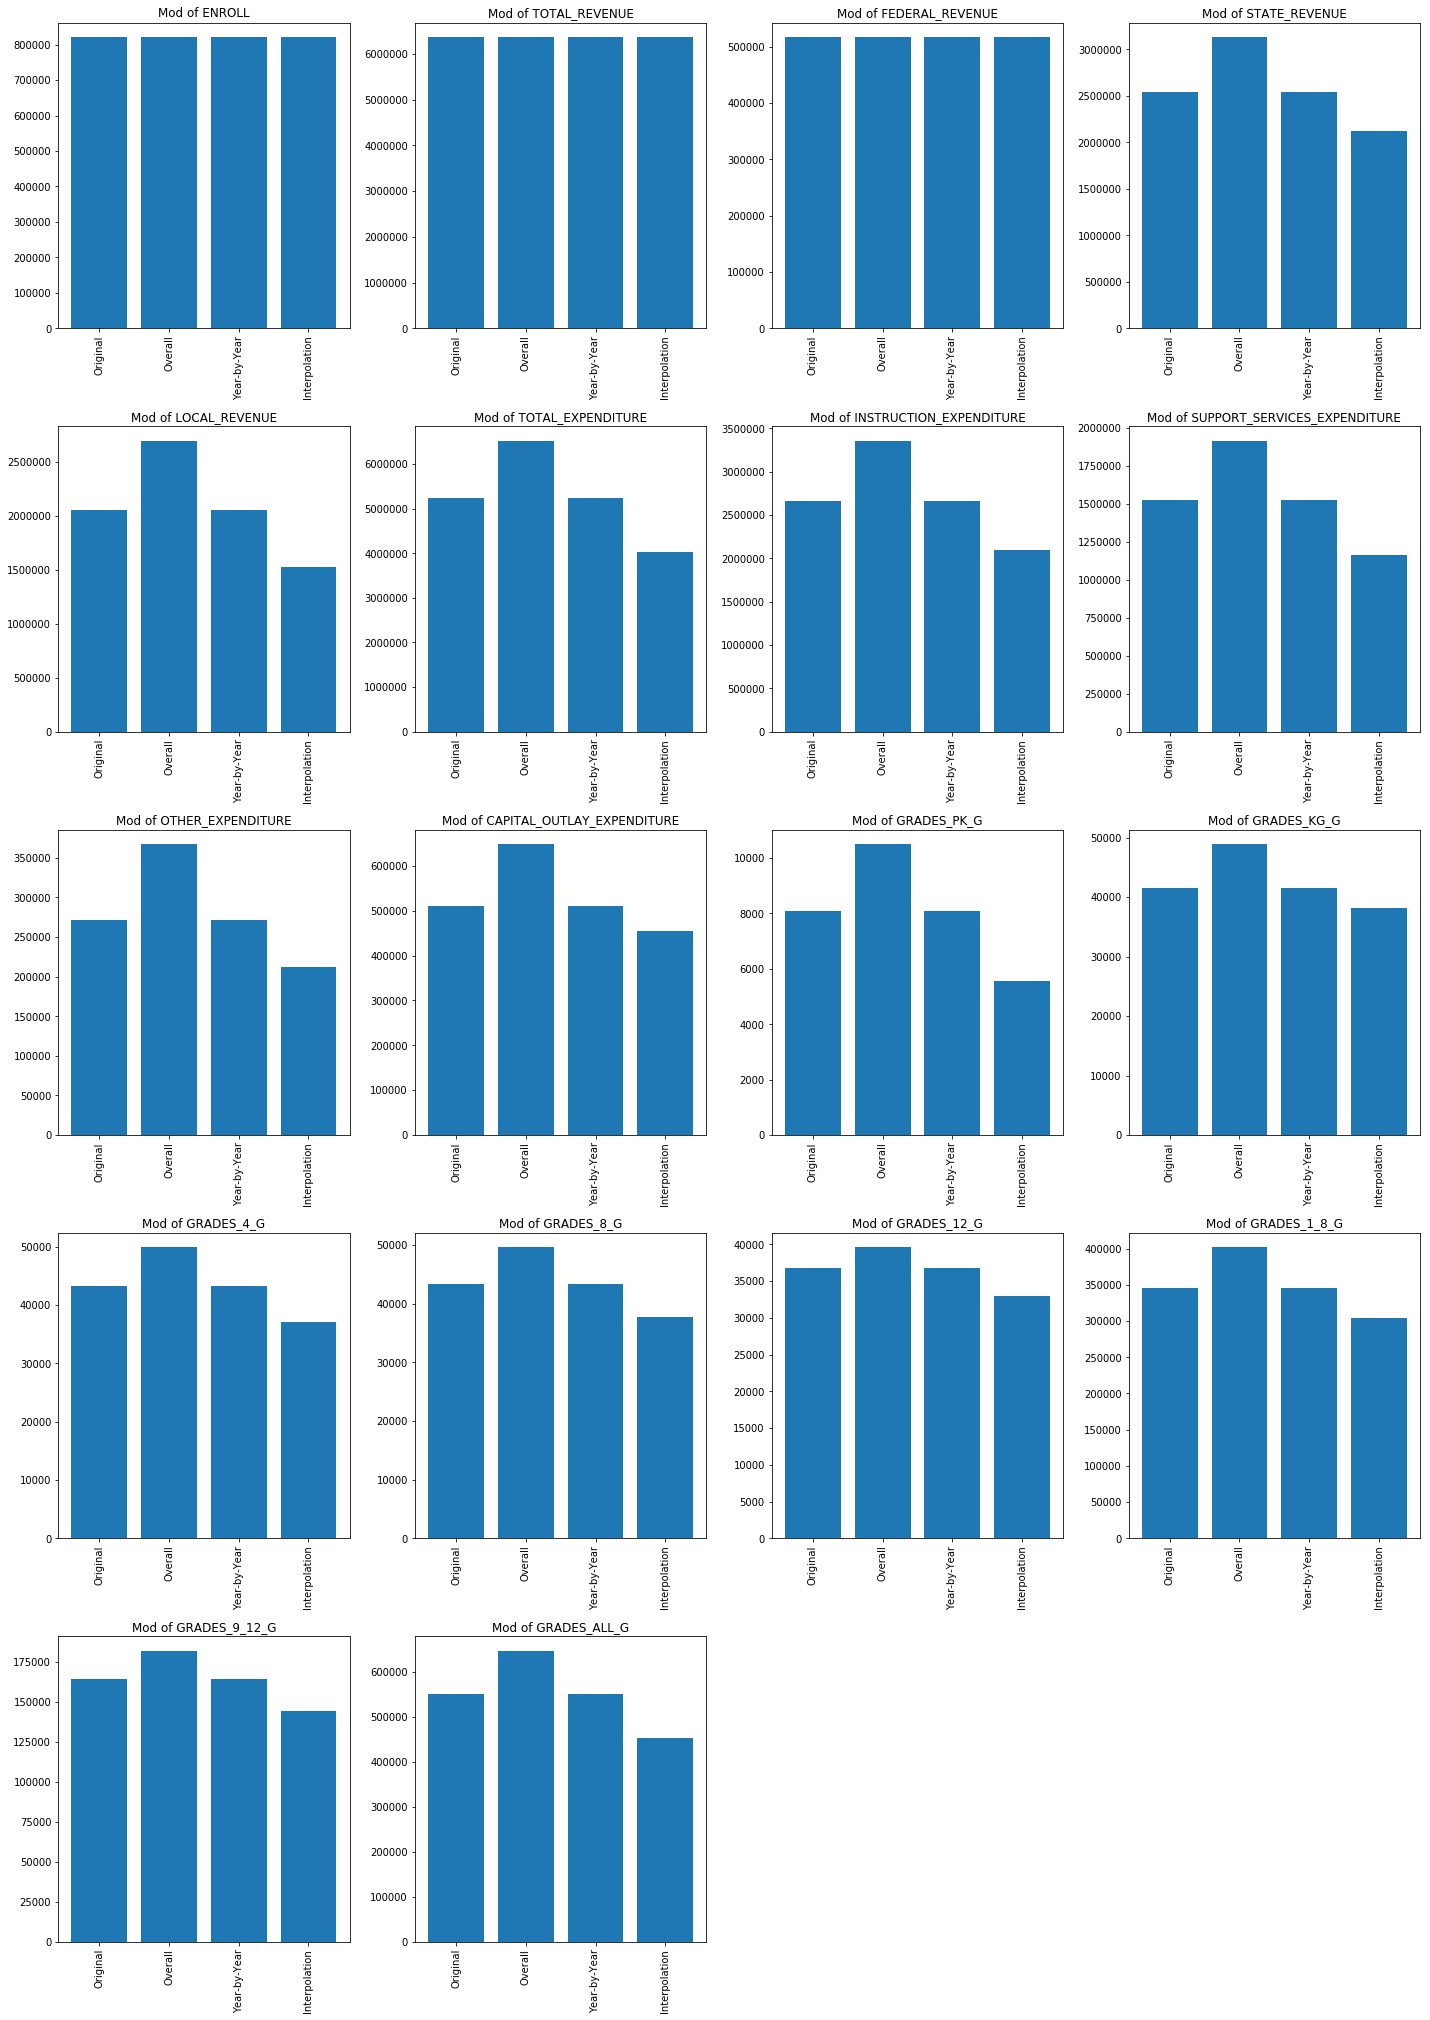

In [32]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill_list):
    df = pd.concat([df_allstates[col], df_allstates_2[col],
                     df_allstates_3[col], df_allstates_4[col]], axis=1)
    
    plt.subplot(len(fill_list), 4, i+1)
    plt.bar(["Original", "Overall", "Year-by-Year", "Interpolation"], df.median())
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(col))
    
plt.tight_layout()
plt.show()